In [10]:
import sys
sys.path.append('../')

from lib_sections import dict_to_graph
from lib_agent import LibraryUser
from lib_model import LibModel
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx


In [2]:
df = pd.read_csv('data/20230413_clb_taps.csv')
df['Datetime'] = pd.to_datetime(df['Datetime'])
entry_df = df.set_index('Datetime')
entry_df = entry_df[entry_df['Direction']=='Entry']['Direction'].resample('10min',  label='left').count().reset_index()
entry_df

,Datetime,Direction
0,2023-04-12 22:50:00+00:00,1
1,2023-04-12 23:00:00+00:00,0
2,2023-04-12 23:10:00+00:00,0
3,2023-04-12 23:20:00+00:00,3
4,2023-04-12 23:30:00+00:00,3
...,...,...
79,2023-04-13 12:00:00+00:00,13
80,2023-04-13 12:10:00+00:00,22
81,2023-04-13 12:20:00+00:00,13
82,2023-04-13 12:30:00+00:00,18


In [3]:
import json
# Opening JSON file
f1 = open('../static/lib_sections.json')
lib_sections = json.load(f1)
f2 = open('../static/sections_attrs.json')
sections_attrs = json.load(f2)
f3 = open('../static/connections.json')
connections = json.load(f3)

In [4]:
lib_graph = dict_to_graph(lib_sections, sections_attrs, connections)
lib_graph

<Axes: xlabel='Datetime', ylabel='num_agents'>

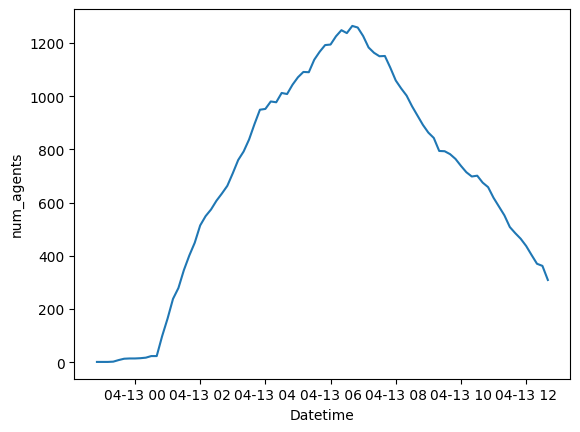

In [5]:
model = LibModel(entry_df, lib_graph)
model.run()
results = model.datacollector.get_model_vars_dataframe()
results['Datetime'] = entry_df['Datetime']
sns.lineplot(results, x='Datetime', y='num_agents')

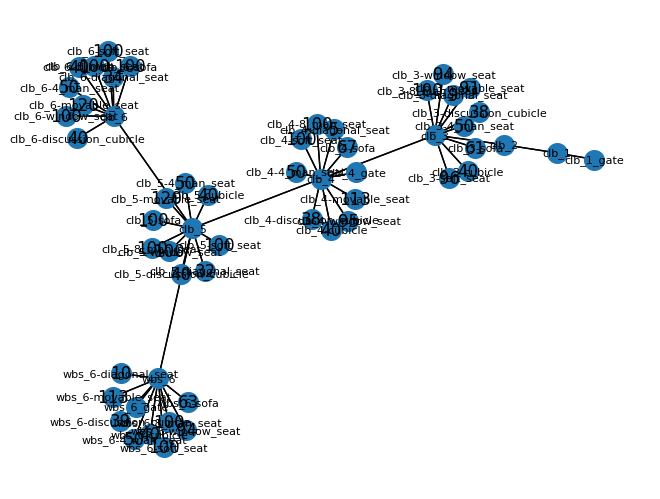

{'clb_3-movable_seat': 91,
 'clb_3-4_man_seat': 50,
 'clb_3-8_man_seat': 100,
 'clb_3-window_seat': 94,
 'clb_3-sofa': 61,
 'clb_3-soft_seat': 96,
 'clb_3-cubicle': 40,
 'clb_3-discussion_cubicle': 38,
 'clb_3-diagonal_seat': 9,
 'clb_4-movable_seat': 113,
 'clb_4-4_man_seat': 50,
 'clb_4-8_man_seat': 100,
 'clb_4-window_seat': 95,
 'clb_4-sofa': 67,
 'clb_4-soft_seat': 100,
 'clb_4-cubicle': 40,
 'clb_4-discussion_cubicle': 38,
 'clb_4-diagonal_seat': 5,
 'clb_5-movable_seat': 120,
 'clb_5-4_man_seat': 50,
 'clb_5-8_man_seat': 100,
 'clb_5-window_seat': 100,
 'clb_5-sofa': 100,
 'clb_5-soft_seat': 100,
 'clb_5-cubicle': 40,
 'clb_5-discussion_cubicle': 40,
 'clb_5-diagonal_seat': 32,
 'clb_6-movable_seat': 120,
 'clb_6-4_man_seat': 50,
 'clb_6-8_man_seat': 100,
 'clb_6-window_seat': 100,
 'clb_6-sofa': 100,
 'clb_6-soft_seat': 100,
 'clb_6-cubicle': 40,
 'clb_6-discussion_cubicle': 40,
 'clb_6-diagonal_seat': 34,
 'wbs_6-movable_seat': 113,
 'wbs_6-4_man_seat': 50,
 'wbs_6-8_man_seat'

In [11]:
# Create a layout for the nodes
pos = nx.spring_layout(model.library_graph)

# Extract capacities into a dictionary for nodes that have the 'capacity' attribute
capacities = {node: model.library_graph.nodes[node]['capacity'] for node in model.library_graph.nodes if 'capacity' in model.library_graph.nodes[node]}

# Draw the nodes with labels
nx.draw(model.library_graph, pos, with_labels=True, node_size=200, font_size=8)

# Draw the edges
nx.draw_networkx_edges(model.library_graph, pos)

# Label nodes with their capacities
nx.draw_networkx_labels(model.library_graph, pos, labels=capacities)

# Show the graph
plt.show()
capacities